In [477]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

%matplotlib inline

In [478]:
movies_df = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings_small.csv')
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [479]:

movies_df = movies_df.drop(['belongs_to_collection','budget','homepage','original_language','release_date','revenue','runtime','spoken_languages','status','video','poster_path','production_companies','production_countries'], axis = 1)
movies_df.head()

,adult,genres,id,imdb_id,original_title,overview,popularity,tagline,title,vote_average,vote_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,NaN,Toy Story,7.7,5415.0
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


In [480]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [481]:
movies_df['genres'] = movies_df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i[
    'name'] for i in x] if isinstance(x, list) else [])

In [482]:
movies_df['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

    v is the number of votes for the movie
    m is the minimum votes required to be listed in the chart
    R is the average rating of the movie
    C is the mean vote across the whole report

In [483]:
V = movies_df[movies_df['vote_count'].notnull()]['vote_count'].astype('float')
#vote_counts
R = movies_df[movies_df['vote_average'].notnull()]['vote_average'].astype('float')

# this is C
C = R.mean()
C

5.618207215133889

In [484]:
M = V.quantile(0.95)
M

434.0

In [485]:
df = pd.DataFrame()
df = movies_df[(md['vote_count'] >= m) & (movies_df['vote_average'].notnull())][['title','vote_count','vote_average','popularity','genres','overview']]

In [486]:
df.shape

(27054, 6)

In [457]:
df['Weighted_average'] = ((R*V) + (C*M))/(V+M)
recm_movies = df.sort_values('Weighted_average', ascending=False).head(500)

In [458]:
recm_movies.head()

,title,vote_count,vote_average,popularity,genres,overview,Weighted_average
314,The Shawshank Redemption,8358.0,8.5,51.6454,"[Drama, Crime]",Framed in the 1940s for the double murder of h...,8.357746
834,The Godfather,6024.0,8.5,41.1093,"[Drama, Crime]","Spanning the years 1945 to 1955, a chronicle o...",8.306334
12481,The Dark Knight,12269.0,8.3,123.167,"[Drama, Action, Crime, Thriller]",Batman raises the stakes in his war on crime. ...,8.208376
2843,Fight Club,9678.0,8.3,63.8696,[Drama],A ticking-time-bomb insomniac and a slippery s...,8.184899
292,Pulp Fiction,8670.0,8.3,140.95,"[Thriller, Crime]","A burger-loving hit man, his philosophical par...",8.172155


Text(0,0.5,'Movie Title')

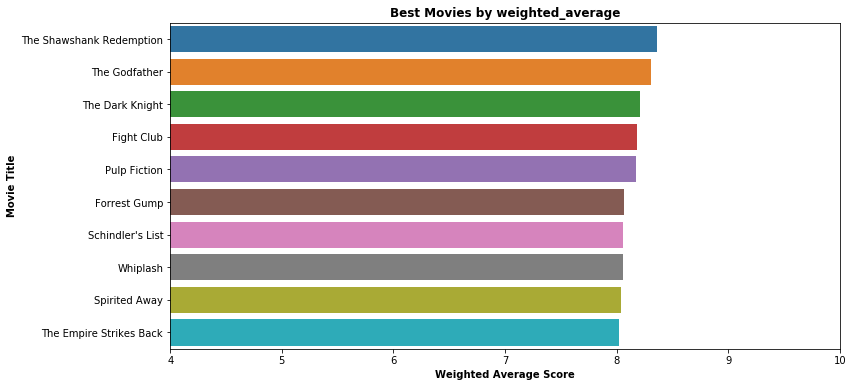

In [487]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=recm_movies.sort_values('Weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=recm_movies['Weighted_average'].head(10), y=recm_movies['title'].head(10), data=recm_movies)
plt.xlim(4, 10)
plt.title('Best Movies by weighted_average', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [460]:
popular = pd.DataFrame()
popular = recm_movies.copy()
popular['popularity'] = recm_movies[recm_movies['popularity'].notnull()]['popularity'].astype('float')
popular = popular.sort_values('popularity',ascending = False)

In [461]:
popular.head()

,title,vote_count,vote_average,popularity,genres,overview,Weighted_average
33356,Wonder Woman,5025.0,7.2,294.337037,"[Action, Adventure, Fantasy]",An Amazon princess comes to the world of Man t...,7.074245
43644,Baby Driver,2083.0,7.2,228.032744,"[Action, Crime]",After being coerced into working for a crime b...,6.927255
24455,Big Hero 6,6289.0,7.8,213.849907,"[Adventure, Family, Animation, Action, Comedy]",The special bond that develops between plus-si...,7.659155
26564,Deadpool,11444.0,7.4,187.860492,"[Action, Adventure, Comedy]",Deadpool tells the origin story of former Spec...,7.334897
26566,Guardians of the Galaxy Vol. 2,4858.0,7.6,185.330992,"[Action, Adventure, Comedy, Science Fiction]",The Guardians must fight to keep their newfoun...,7.437472


Text(0,0.5,'Movie Title')

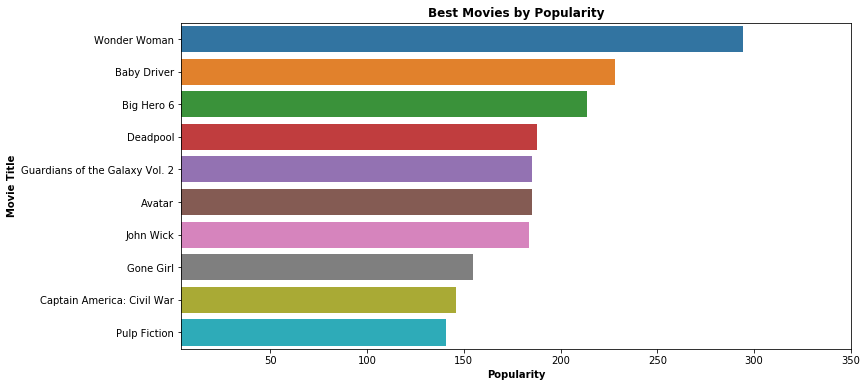

In [462]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=popular['popularity'].head(10), y=popular['title'].head(10), data=popular)
plt.xlim(4, 350)
plt.title('Best Movies by Popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [489]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_movies = recm_movies.drop('genres', axis=1).join(s)
gen_movies.head(10)
#gen_movies.columns

,title,vote_count,vote_average,popularity,overview,Weighted_average,genre
0,Toy Story,5415.0,7.7,21.9469,"Led by Woody, Andy's toys live happily in his ...",7.545529,Animation
0,Toy Story,5415.0,7.7,21.9469,"Led by Woody, Andy's toys live happily in his ...",7.545529,Comedy
0,Toy Story,5415.0,7.7,21.9469,"Led by Woody, Andy's toys live happily in his ...",7.545529,Family
5,Heat,1886.0,7.7,17.9249,"Obsessive master thief, Neil McCauley leads a ...",7.310561,Action
5,Heat,1886.0,7.7,17.9249,"Obsessive master thief, Neil McCauley leads a ...",7.310561,Crime
5,Heat,1886.0,7.7,17.9249,"Obsessive master thief, Neil McCauley leads a ...",7.310561,Drama
5,Heat,1886.0,7.7,17.9249,"Obsessive master thief, Neil McCauley leads a ...",7.310561,Thriller
15,Casino,1343.0,7.8,10.1374,The life of the gambling paradise – Las Vegas ...,7.267137,Drama
15,Casino,1343.0,7.8,10.1374,The life of the gambling paradise – Las Vegas ...,7.267137,Crime
31,Twelve Monkeys,2470.0,7.4,12.2973,"In the year 2035, convict James Cole reluctant...",7.133713,Science Fiction


In [490]:
#m = vote_counts.quantile(0.80)
df_w = gen_movies[ (gen_movies['genre'] == 'Action') & (gen_movies['vote_count'] >= m)]
df_w.sort_values('Weighted_average', ascending = False).head(10)

,title,vote_count,vote_average,popularity,overview,Weighted_average,genre
12481,The Dark Knight,12269.0,8.3,123.167,Batman raises the stakes in his war on crime. ...,8.208376,Action
1154,The Empire Strikes Back,5998.0,8.2,19.471,"The epic saga continues as Luke Skywalker, in ...",8.025793,Action
15480,Inception,14075.0,8.1,29.1081,"Cobb, a skilled thief who commits corporate es...",8.025763,Action
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,29.3244,Aragorn is revealed as the heir to the ancient...,7.975624,Action
256,Star Wars,6778.0,8.1,42.1497,Princess Leia is captured and held hostage by ...,7.950652,Action
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,32.0707,"Young hobbit Frodo Baggins, after inheriting a...",7.889160,Action
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,29.4235,Frodo and Sam are trekking to Mordor to destro...,7.871988,Action
23753,Guardians of the Galaxy,10014.0,7.9,53.2916,"Light years from Earth, 26 years after being a...",7.805216,Action
2458,The Matrix,9079.0,7.9,33.3663,"Set in the 22nd century, The Matrix tells the ...",7.795901,Action
13605,Inglourious Basterds,6598.0,7.9,16.8956,"In Nazi-occupied France during World War II, a...",7.759173,Action


Text(0,0.5,'Action Movie Title')

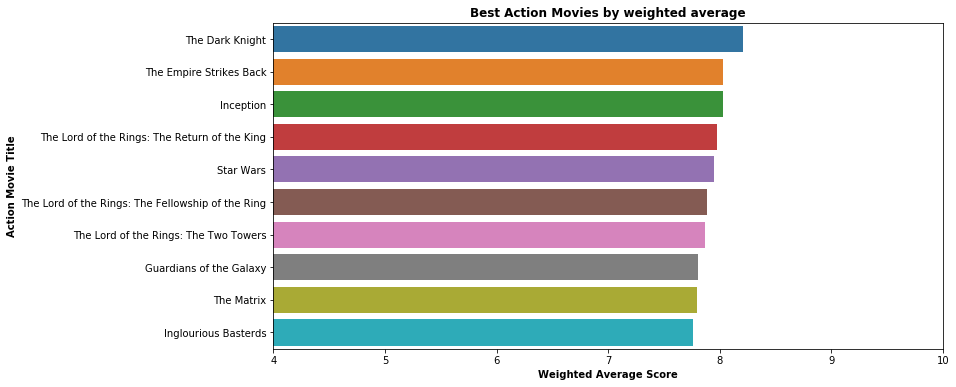

In [492]:
df_w = df_w.sort_values('Weighted_average', ascending = False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=df_w['Weighted_average'].head(10), y=df_w['title'].head(10), data=df_w)
plt.xlim(4, 10)
plt.title('Best Action Movies by weighted average', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Action Movie Title', weight='bold')

Text(0,0.5,'Drama Movie Title')

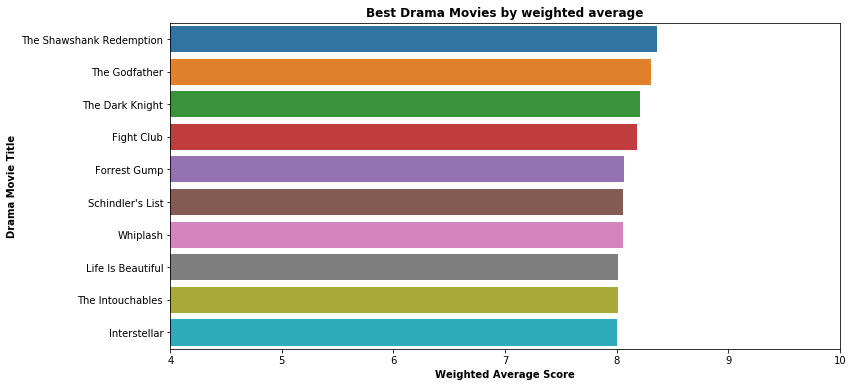

In [493]:
df_w = gen_md[ (gen_md['genre'] == 'Drama') & (gen_md['vote_count'] >= m)]

df_w = df_w.sort_values('Weighted_average', ascending = False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=df_w['Weighted_average'].head(10), y=df_w['title'].head(10), data=df_w)
plt.xlim(4, 10)
plt.title('Best Drama Movies by weighted average', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Drama Movie Title', weight='bold')

In [467]:
cont_recm = recm_movies.copy()
cont_recm.head()

,title,vote_count,vote_average,popularity,genres,overview,Weighted_average
314,The Shawshank Redemption,8358.0,8.5,51.6454,"[Drama, Crime]",Framed in the 1940s for the double murder of h...,8.357746
834,The Godfather,6024.0,8.5,41.1093,"[Drama, Crime]","Spanning the years 1945 to 1955, a chronicle o...",8.306334
12481,The Dark Knight,12269.0,8.3,123.167,"[Drama, Action, Crime, Thriller]",Batman raises the stakes in his war on crime. ...,8.208376
2843,Fight Club,9678.0,8.3,63.8696,[Drama],A ticking-time-bomb insomniac and a slippery s...,8.184899
292,Pulp Fiction,8670.0,8.3,140.95,"[Thriller, Crime]","A burger-loving hit man, his philosophical par...",8.172155


In [468]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

cont_recm['overview'] = cont_recm['overview'].fillna('')

In [469]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(cont_recm['overview'])

In [470]:
tfv_matrix.shape

(500, 1275)

In [471]:
cos_sim = linear_kernel(tfv_matrix, tfv_matrix)

In [472]:
cont_recm = cont_recm.reset_index()
indices = pd.Series(cont_recm.index, index=cont_recm['title'])
indices.head(20)

title
The Shawshank Redemption                          0
The Godfather                                     1
The Dark Knight                                   2
Fight Club                                        3
Pulp Fiction                                      4
Forrest Gump                                      5
Schindler's List                                  6
Whiplash                                          7
Spirited Away                                     8
The Empire Strikes Back                           9
Inception                                        10
Life Is Beautiful                                11
The Intouchables                                 12
Interstellar                                     13
The Godfather: Part II                           14
The Lord of the Rings: The Return of the King    15
Leon: The Professional                           16
One Flew Over the Cuckoo's Nest                  17
The Green Mile                                   18
Star W

In [473]:
def sugg_recm(title):
    # Get the index corresponding to original_title
    idx = indices[title]    
    # Get the pairwsie similarity scores 
    sim_scores = list(enumerate(cosine_sim[idx]))
     # Sort the movies 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [474]:
sugg_recm('Star Wars').head(10)

9                           The Empire Strikes Back
134                    Star Wars: The Force Awakens
56                               Return of the Jedi
230                              The Princess Bride
276                                    Wonder Woman
215                              The Great Dictator
360    Star Wars: Episode III - Revenge of the Sith
347              Nausicaä of the Valley of the Wind
68                                       Big Hero 6
208                                         Aladdin
Name: title, dtype: object

In [475]:
sugg_recm('Sherlock Holmes: A Game of Shadows').head(10)

2              The Dark Knight
425            Despicable Me 2
41     The Wolf of Wall Street
77           Good Will Hunting
405            Sherlock Holmes
105               Donnie Darko
408         The Man from Earth
328             Doctor Strange
138              Batman Begins
336         X-Men: First Class
Name: title, dtype: object

In [476]:
sugg_recm('Dilwale Dulhania Le Jayenge').head(10)

406    Indiana Jones and the Temple of Doom
343                             Still Alice
73                                Prisoners
131                     There Will Be Blood
284                                3 Idiots
256                         The Deer Hunter
14                   The Godfather: Part II
426                         Two Is a Family
379                            The Graduate
156                     Slumdog Millionaire
Name: title, dtype: object